## Import libraries

In [49]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

## Reading the image

cv.IMREAD_GRAYSCALE || 0

cv.IMREAD_COLOR || 1

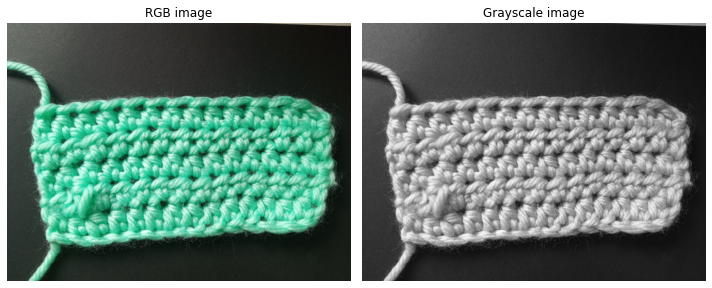

In [50]:
lana = 'prueba1.jpg'
img = cv.imread(lana, cv.IMREAD_COLOR)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray = cv.imread(lana, cv.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(1,2,figsize=(10,4))

ax[0].imshow(img_rgb)
ax[0].axis('off')
ax[0].set_title('RGB image')

ax[1].imshow(img_gray, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Grayscale image')

fig.tight_layout()
plt.savefig('img_rgb_gray.png', dpi=200, bbox_inches='tight', pad_inches=0)
plt.show()


## Looking at every RGB channel

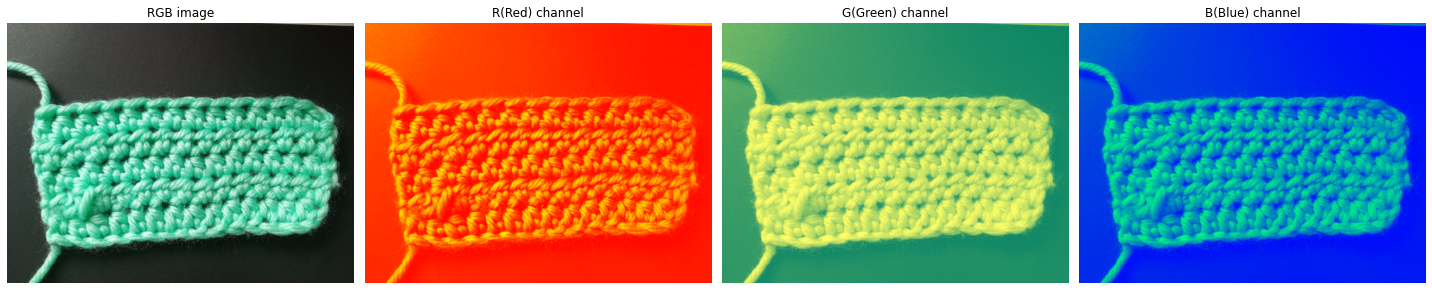

In [51]:
fig, ax = plt.subplots(1,4,figsize=(20,4))

ax[0].imshow(img_rgb)
ax[0].axis('off')
ax[0].set_title('RGB image')

ax[1].imshow(img_rgb[:,:,0],cmap='autumn')
ax[1].axis('off')
ax[1].set_title('R(Red) channel')

ax[2].imshow(img_rgb[:,:,1],cmap='summer')
ax[2].axis('off')
ax[2].set_title('G(Green) channel')

ax[3].imshow(img_rgb[:,:,2],cmap='winter')
ax[3].axis('off')
ax[3].set_title('B(Blue) channel')

fig.tight_layout()
plt.savefig('img_rgb.png', dpi=200, bbox_inches='tight', pad_inches=0)
plt.show()

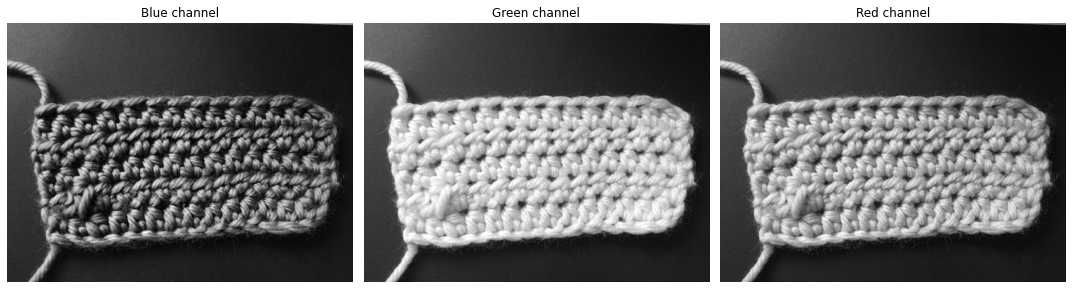

In [52]:
(B, G, R) = cv.split(img_rgb)
cv.imwrite("blue.png", B)
cv.imwrite("green.png", G)
cv.imwrite("red.png", R)

fig, ax = plt.subplots(1,3,figsize=(15,4))

ax[0].imshow(B, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Blue channel')

ax[1].imshow(G, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Green channel')

ax[2].imshow(R, cmap='gray')
ax[2].axis('off')
ax[2].set_title('Red channel')

fig.tight_layout()
plt.savefig('rgb_channels.png', dpi=200, bbox_inches='tight', pad_inches=0)
plt.show()


## Finding the Histogram

In [53]:
img = cv.imread(lana, 0)
hist = cv.calcHist([img],[0],None,[256],[0,256])

## Plotting the Histogram

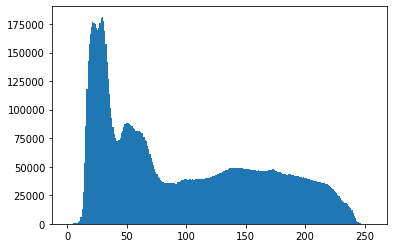

In [54]:
plt.hist(img.ravel(),256,[0,256]); plt.show()

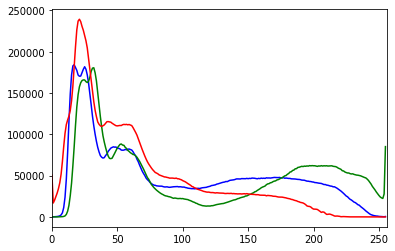

In [55]:
color = ('b','g','r')
img = cv.imread(lana)
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

## Masking the image

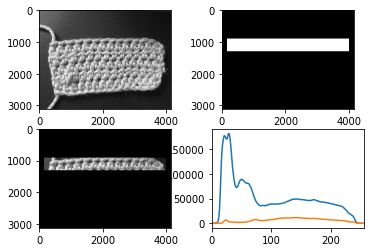

True

In [56]:
img = cv.imread(lana, 0)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[900:1300, 150:4000] = 255
masked_img = cv.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv.calcHist([img],[0],mask,[256],[0,256])
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()
cv.imwrite('masked_img.jpg',masked_img)

## Histogram Equalization

True

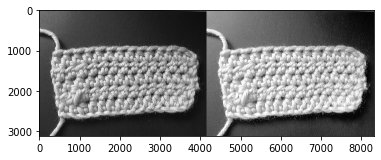

In [57]:
img = cv.imread(lana,0)
equ = cv.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
plt.imshow(res, cmap='gray')
cv.imwrite('hist_eq.jpg', res)

## CLAHE (Contrast Limited Adaptive Histogram Equalization)

True

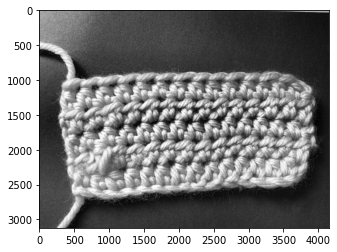

In [58]:
# create a CLAHE object (Arguments are optional).
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(3,3))
cl1 = clahe.apply(img)
plt.imshow(cl1, cmap='gray')
cv.imwrite('clahe.jpg',cl1)

## Thresholding

Using grayscale images

cv.threshold returns the threshold and the thresholded img
https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

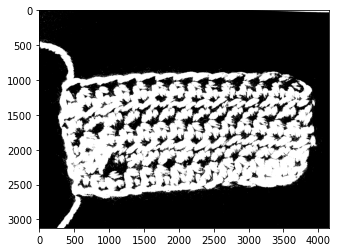

In [59]:
ret,th1 = cv.threshold(img_gray,127,255,cv.THRESH_BINARY)
plt.imshow(th1, cmap='gray')

### OTSU Thresholding

107.0


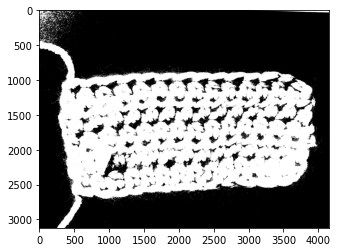

In [60]:
ret2,th2 = cv.threshold(img_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
print(ret2)
plt.imshow(th2, cmap='gray')

### OTSU's Thresholding after Gaussian filtering

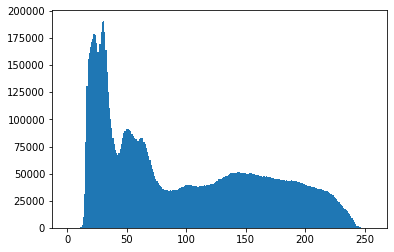

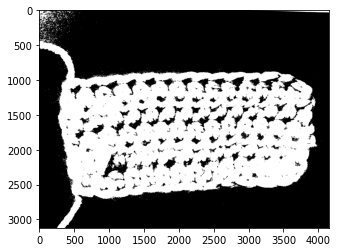

In [61]:
blur = cv.GaussianBlur(img_gray,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.hist(blur.ravel(),256,[0,256]); plt.show()
plt.imshow(th3, cmap='gray')

## Drawing the contours

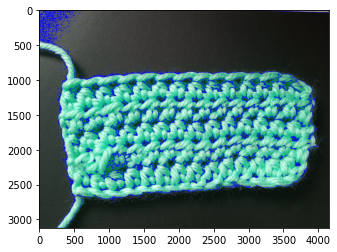

In [62]:
contours, hierarchy = cv.findContours(th3, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
cv.drawContours(img_rgb, contours, -1, (0,0,255), 3)
cv.imwrite('contours.jpg',img_rgb)
plt.imshow(img_rgb)

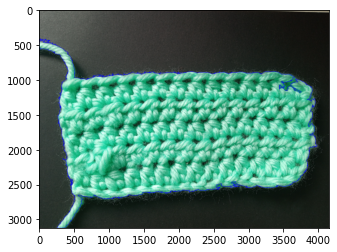

In [63]:
## Finding the biggest contour
biggestArea = 0

for cnt in contours:
    area = cv.contourArea(cnt)
    if biggestArea < area:
        biggestArea = area
        biggestContour = cnt

img = cv.imread(lana, cv.IMREAD_COLOR)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
cv.drawContours(img_rgb, biggestContour, -1, (0,0,255), 3)
cv.imwrite('biggestContour.jpg',img_rgb)
plt.imshow(img_rgb)

## Bounding Rectangle

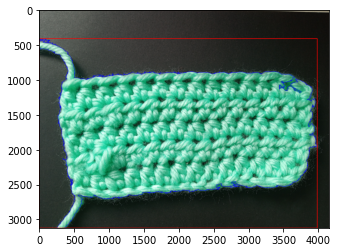

In [64]:
x,y,w,h = cv.boundingRect(biggestContour)
cv.rectangle(img_rgb,(x,y),(x+w,y+h),(255,0,0),8)
plt.imshow(img_rgb)

## Morphological Transformations

https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html

In [65]:
kernel = np.ones((5,5),np.uint8)

# Dilation
dilation = cv.dilate(th3, kernel, iterations = 20)

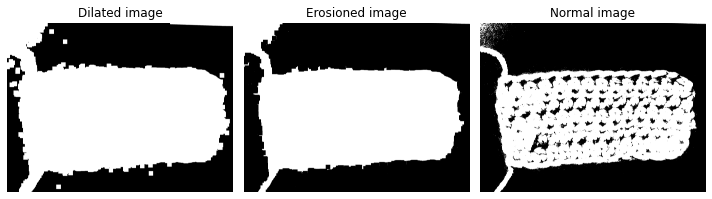

In [66]:
# Erosion
erosion = cv.erode(dilation, kernel, iterations = 20)

fig, ax = plt.subplots(1,3,figsize=(10,4))

ax[0].imshow(dilation, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Dilated image')

ax[1].imshow(erosion, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Erosioned image')

ax[2].imshow(th3, cmap='gray')
ax[2].axis('off')
ax[2].set_title('Normal image')

fig.tight_layout()
plt.savefig('5_20_Closing.jpg', dpi=200, bbox_inches='tight', pad_inches=0)
plt.show()


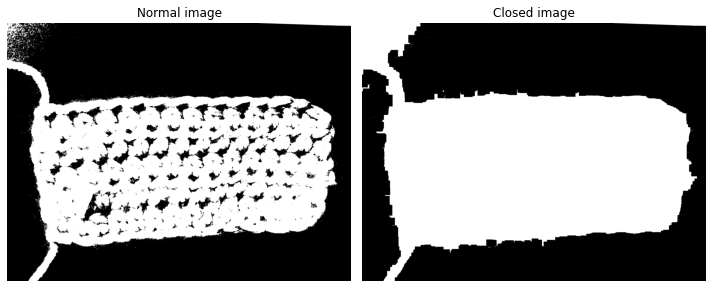

In [67]:
# Closing -> Erasing the holes
closing = cv.morphologyEx(th3, cv.MORPH_CLOSE, kernel, iterations = 18)

fig, ax = plt.subplots(1,2,figsize=(10,4))

ax[0].imshow(th3, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Normal image')

ax[1].imshow(closing, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Closed image')

fig.tight_layout()
plt.savefig('5_18_Closing2.jpg', dpi=200, bbox_inches='tight', pad_inches=0)
plt.show()

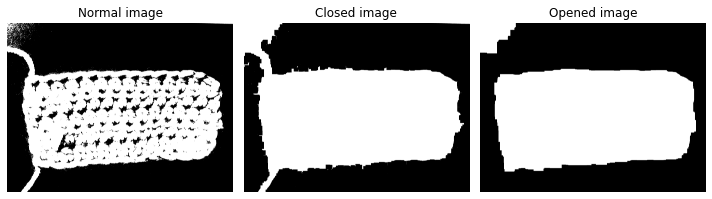

In [68]:
# Opening -> Erasing the tails
kernel = np.ones((13,13),np.uint8)

opening = cv.morphologyEx(closing, cv.MORPH_OPEN, kernel, iterations = 15)

fig, ax = plt.subplots(1,3,figsize=(10,4))

ax[0].imshow(th3, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Normal image')

ax[1].imshow(closing, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Closed image')

ax[2].imshow(opening, cmap='gray')
ax[2].axis('off')
ax[2].set_title('Opened image')

fig.tight_layout()
plt.savefig('13_15_Opening.jpg', dpi=200, bbox_inches='tight', pad_inches=0)
plt.show()

## Finding the contours 

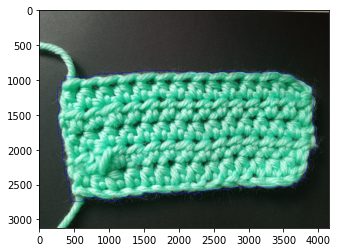

In [81]:
contours, hierarchy = cv.findContours(opening, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
cv.drawContours(img_rgb, contours, -1, (0,0,255), 3)
cv.imwrite('contours.jpg',img_rgb)
plt.imshow(img_rgb)

## Finding the biggest contour
def findBiggestContour(contours):
    biggestArea = 0

    for cnt in contours:
        area = cv.contourArea(cnt)
        if biggestArea < area:
            biggestArea = area
            biggestContour = cnt
    return biggestArea, biggestContour

biggestArea, biggestContour = findBiggestContour(contours)

img = cv.imread(lana, cv.IMREAD_COLOR)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
cv.drawContours(img_rgb, biggestContour, -1, (0,0,255), 3)
cv.imwrite('yarnContour.jpg',img_rgb)
plt.imshow(img_rgb)

## Bounding Rectangle

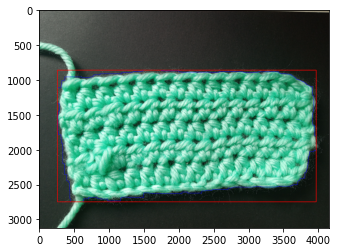

In [82]:
x,y,w,h = cv.boundingRect(biggestContour)
cv.rectangle(img_rgb,(x,y),(x+w,y+h),(255,0,0),8)
plt.imshow(img_rgb)

## Cropping the image

[265, 860, 3711, 1885]


True

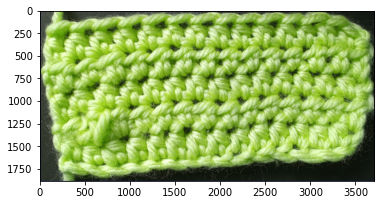

In [83]:
img = cv.imread(lana)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 
dst = cv.Canny(gray, 0, 150)
blured = cv.blur(dst, (5,5), 0)    
MIN_CONTOUR_AREA=200
img_thresh = cv.adaptiveThreshold(blured, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 11, 2)

[X, Y, W, H] = cv.boundingRect(biggestContour)
box=cv.rectangle(img, (X, Y), (X + W, Y + H), (0,0,255), 2)

cropped_image = img[Y:Y+H, X:X+W]
print([X,Y,W,H])
plt.imshow(cropped_image)
cv.imwrite('cropped.png', cropped_image)

## Segundo Preprocesamiento

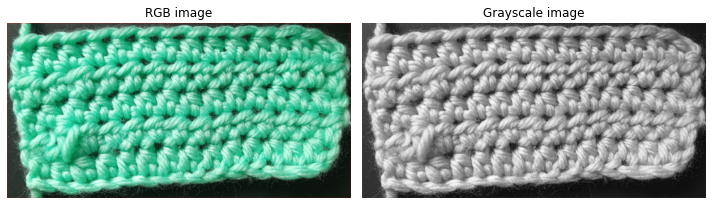

In [84]:
cropped = 'cropped.png'
img = cv.imread(cropped, cv.IMREAD_COLOR)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray = cv.imread(cropped, cv.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(1,2,figsize=(10,4))

ax[0].imshow(img_rgb)
ax[0].axis('off')
ax[0].set_title('RGB image')

ax[1].imshow(img_gray, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Grayscale image')

fig.tight_layout()
plt.savefig('img_rgb_gray.png', dpi=200, bbox_inches='tight', pad_inches=0)
plt.show()


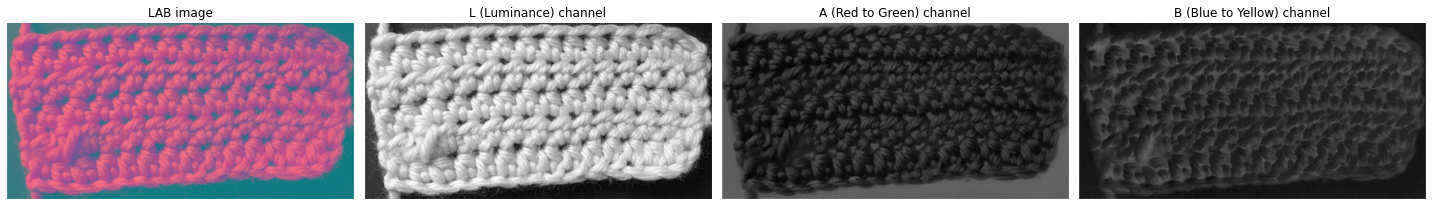

In [85]:
img_lab = cv.cvtColor(cropped_image, cv.COLOR_BGR2LAB)

fig, ax = plt.subplots(1,4,figsize=(20,4))

ax[0].imshow(img_lab,cmap='gray')
ax[0].axis('off')
ax[0].set_title('LAB image')

ax[1].imshow(img_lab[:,:,0],cmap='gray')
ax[1].axis('off')
ax[1].set_title('L (Luminance) channel')

ax[2].imshow(img_lab[:,:,1],cmap='gray')
ax[2].axis('off')
ax[2].set_title('A (Red to Green) channel')

ax[3].imshow(img_lab[:,:,2],cmap='gray')
ax[3].axis('off')
ax[3].set_title('B (Blue to Yellow) channel')

fig.tight_layout()
plt.savefig('img_lab.png', dpi=200, bbox_inches='tight', pad_inches=0)
plt.show()

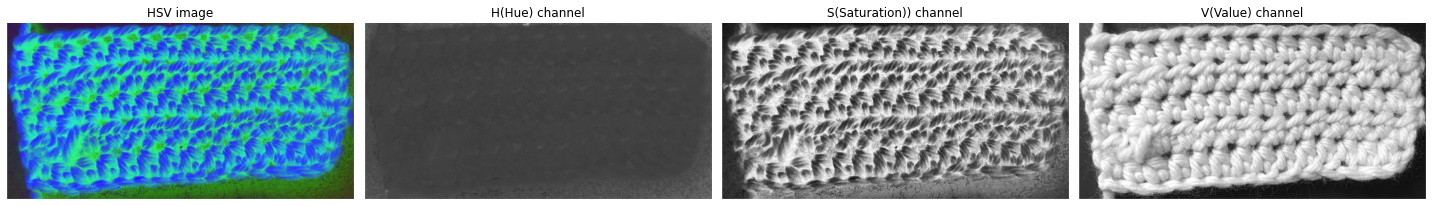

In [86]:
img_hsv = cv.cvtColor(cropped_image, cv.COLOR_RGB2HSV)

fig, ax = plt.subplots(1,4,figsize=(20,4))

ax[0].imshow(img_hsv)
ax[0].axis('off')
ax[0].set_title('HSV image')

ax[1].imshow(img_hsv[:,:,0],cmap='gray')
ax[1].axis('off')
ax[1].set_title('H(Hue) channel')

ax[2].imshow(img_hsv[:,:,1],cmap='gray')
ax[2].axis('off')
ax[2].set_title('S(Saturation)) channel')

ax[3].imshow(img_hsv[:,:,2],cmap='gray')
ax[3].axis('off')
ax[3].set_title('V(Value) channel')

fig.tight_layout()
plt.savefig('img_hsv.png', dpi=200, bbox_inches='tight', pad_inches=0)
plt.show()

## Working with Luminance channel

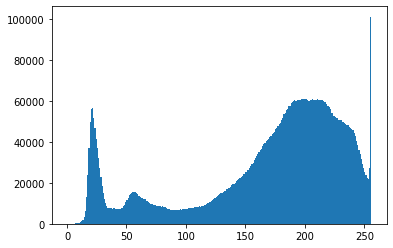

In [87]:
# Histogram
value = img_hsv[:,:,2]

hist = cv.calcHist([value],[0],None,[256],[0,256])
plt.hist(value.ravel(),256,[0,256]); plt.show()

True

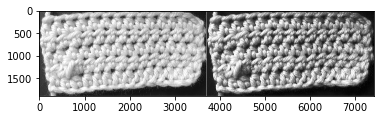

In [88]:
# Histogram Equalization
equ = cv.equalizeHist(value)
res = np.hstack((value,equ)) #stacking images side-by-side
plt.imshow(res, cmap='gray')
cv.imwrite('hist_eq.jpg', res)

True

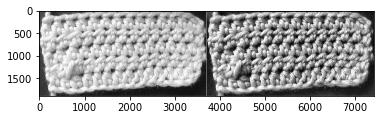

In [89]:
# CLAHE
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(9,9))
cl = clahe.apply(value)
res = np.hstack((value,cl)) #stacking images side-by-side
plt.imshow(res, cmap='gray')
cv.imwrite('clahe.jpg',res)

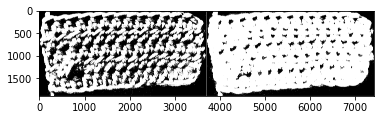

In [90]:
# OTSU Thresholding
ret1,th1 = cv.threshold(cl,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret2,th2 = cv.threshold(value,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

res = np.hstack((th1,th2)) #stacking images side-by-side
plt.imshow(res, cmap='gray')

## Getting the first row

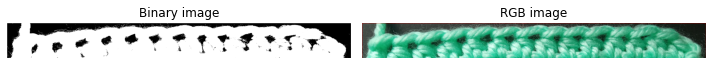

True

In [91]:
def crop_img(img, scale=1.0):
    center_y = img.shape[0] / 2
    width_scaled, height_scaled = img.shape[1] * scale, img.shape[0] * scale
    top_y, bottom_y = 0, height_scaled
    img_cropped = img[int(top_y):int(bottom_y)]
    return img_cropped

img_cropped = crop_img(th2, 0.20)
rgb_cropped = crop_img(img_rgb, 0.20)

fig, ax = plt.subplots(1,2,figsize=(10,4))

ax[0].imshow(img_cropped, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Binary image')

ax[1].imshow(rgb_cropped)
ax[1].axis('off')
ax[1].set_title('RGB image')

fig.tight_layout()
plt.show()

cv.imwrite('cropped.jpg',img_cropped)

## Finding the holes

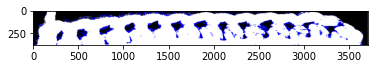

In [92]:
img = cv.imread('cropped.jpg', cv.IMREAD_COLOR)

contours, hierarchy = cv.findContours(img_cropped, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

biggestArea, biggestContour = findBiggestContour(contours)

for cnt in contours:
    if cv.contourArea(cnt) != biggestArea:
        cv.drawContours(img, cnt, -1, (0,0,255), 3)

cv.imwrite('holes.jpg',img)
plt.imshow(img)